# Analiziranje oseb

V tej datoteki analiziramo podatke, povezane z osebami iz fantazijske zbirke knjig "Malazan Book of the Fallen" avtorja Stevena Eriksona in zbirke "Novels of the Malazan Empire" avtorja Ian C. Esslemonta. V prvi zbirki je 10 knjig, v drugi pa 6. Obe zbirki se dogajata v istem svetu, zato je tudi veliko oseb prisotnih tako v eni kot v drugi.

In [1]:
import os
import pandas as pd

directory_obdelani = 'podatki-obdelani'
csv_osebe = 'osebe.csv'
csv_knjige = 'knjige.csv'
#količina izpisanih vrstic
pd.set_option("display.max_rows", 12)


path_osebe = os.path.join(directory_obdelani, csv_osebe)
osebe = pd.read_csv(path_osebe)
osebe.index += 1

path_knjige = os.path.join(directory_obdelani, csv_knjige)
knjige = pd.read_csv(path_knjige)
knjige.index += 1

## 1.Osnovne informacije

### 1.1 Razpredelnica - osebe

Tu imamo razpredelnico, iz katere pridobivamo podatke za nadalnje analiziranje. V njej imamo ime osebe, v katerih knjigah se ta oseba pojavlja in kratek opis. Podatke za analizo jemljemo tudi iz razpredelnice za knjige.

In [2]:
osebe

,ime,pojavljanje,opis
1,A'Karonys,GotM,High Mage of the Malazan Empire
2,Abide,CG,"Pure Forkrul Assail, lawful inquisitor, mystic"
3,Able,HoC,Soldier in the Bonehunters
4,Abrastal,"DoD, CG",Queen of Bolkando
5,Absi,"DoD, CG",Son of Onos T'oolan (Tool) and Hetan
...,...,...,...
690,Withal,"MT, BH, RG, DoD, CG",A Meckros Weaponsmith who briefly works for th...
691,Wither,"MT, RG",Shadow wraith
692,Wu,"DL, DhL",Dal Hon mage that would later take the name Ke...
693,Yan Tovis,"MT, BH, RG, DoD, CG","Letherii Atri-Preda at Feint Reach, also calle..."


### 1.2 Osnovne statistike

Nekaj osnovnih statistik naših podatkov.

In [3]:
osebe.describe()

,ime,pojavljanje,opis
count,694,693,694
unique,694,132,505
top,A'Karonys,MoI,Soldier in the Bonehunters
freq,1,67,44


## 2.Tabele

### 2.1 Pogostost začetnic

Tu vidimo, koliko imen ima isto začetnico.

In [4]:
zacetnice_ponovitve = {}
for i in "ABCDEFGHIJKLMNOPRSTUVWXYZ":
    zacetnice_ponovitve[i] = 0
    for j in osebe['ime']:
        if i == j[0]:
            zacetnice_ponovitve[i] += 1
            
zacetnice = {'začetnice':list(zacetnice_ponovitve.keys()), 'ponovitve':list(zacetnice_ponovitve.values())}
zacetnice_pd = pd.DataFrame.from_dict(zacetnice)
zacetnice_pd = zacetnice_pd.set_index(['začetnice'])
zacetnice_pd

,ponovitve
začetnice,
A,31
B,70
C,32
D,24
E,13
...,...
V,10
W,6
X,0


### 2.2 Število pojavitev v knjigah

Za vsako osebo imamo podano, v koliko knjigah se pojavi.

In [5]:
st_pojavitev = {}
for i in osebe.index:
    x = str(osebe.loc[i]['pojavljanje']).count(' ')
    st_pojavitev[osebe.loc[i]['ime']] = x + 1  

st_pojavitev_ = {'oseba':list(st_pojavitev.keys()), 'pojavitve':list(st_pojavitev.values())}
st_pojavitev_v_knjigah = pd.DataFrame.from_dict(st_pojavitev_)
st_pojavitev_v_knjigah = st_pojavitev_v_knjigah.set_index(['oseba'])
st_pojavitev_v_knjigah

,pojavitve
oseba,
A'Karonys,1
Abide,1
Able,1
Abrastal,2
Absi,2
...,...
Withal,5
Wither,2
Wu,2


In [6]:
st_pojavitev_v_knjigah_top_20 = st_pojavitev_v_knjigah.sort_values('pojavitve', ascending=False).head(20)
st_pojavitev_v_knjigah_top_20

,pojavitve
oseba,
Cotillion,8
Ben Adaephon Delat,8
Shadowthrone,8
Fiddler,7
Icarium,7
...,...
Grub,6
Cuttle,6
Koryk,5


### 2.3 Pogostost števila pojavitev

Pogostost pojavitve nam pove, koliko oseb se pojavi samo v eni knjigi, koliko v dveh, itd. Kakor lahko vidimo, se ena oseba pojavi v največ osmih knjigah.

In [7]:
#pogostost določenih pojavitev
st_pojavitev_v_knjigah_pogostost = st_pojavitev_v_knjigah.pivot_table(index = ['pojavitve'], aggfunc='size')
st_pojavitev_v_knjigah_pogostost = st_pojavitev_v_knjigah_pogostost.reset_index()
st_pojavitev_v_knjigah_pogostost.columns = ['pojavitve', 'pogostost pojavitve']
st_pojavitev_v_knjigah_pogostost

,pojavitve,pogostost pojavitve
0,1,348
1,2,147
2,3,88
3,4,59
4,5,35
5,6,8
6,7,6
7,8,3


### 2.4 Pojavitve imen v opisih

Tu analiziramo, kako se osebe pojavljajo v opisih drugih oseb, torej koliko vpliva ima določena oseba na ostale.

In [8]:
imena_ponovitve = {}
for j in osebe['ime']:
    imena_ponovitve[j] = 0
    for k in osebe['opis']:
        if str(j) in str(k):
            imena_ponovitve[j] += 1

imena = {'ime':list(imena_ponovitve.keys()), 'pojavitve':list(imena_ponovitve.values())}
imena_opisi_pojavitve = pd.DataFrame.from_dict(imena)
imena_opisi_pojavitve = imena_opisi_pojavitve.set_index(['ime'])
imena_opisi_pojavitve

,pojavitve
ime,
A'Karonys,0
Abide,0
Able,0
Abrastal,1
Absi,1
...,...
Withal,1
Wither,0
Wu,0


In [9]:
imena_opisi_pojavitve_top_20 = imena_opisi_pojavitve.sort_values(by=['pojavitve'], ascending=False).head(20)
imena_opisi_pojavitve_top_20

,pojavitve
ime,
Anomander Rake,10
Lady Envy,8
Hunt,8
Burn,7
Karsa Orlong,6
...,...
Cafal,3
Kron,3
Tavore Paran,3


## 3. Grafi

### 3.1 Graf začetnic

Graf števila oseb z isto začetnico nam pokaže, koliko oseb ima isto začetnico. Kot lahko vidimo, se nobena oseba ne začne z črkama x in y, najbolj pogosta začetnica pa je s.

<Axes: title={'center': 'Število oseb z isto začetnico'}, xlabel='začetnice', ylabel='število oseb'>

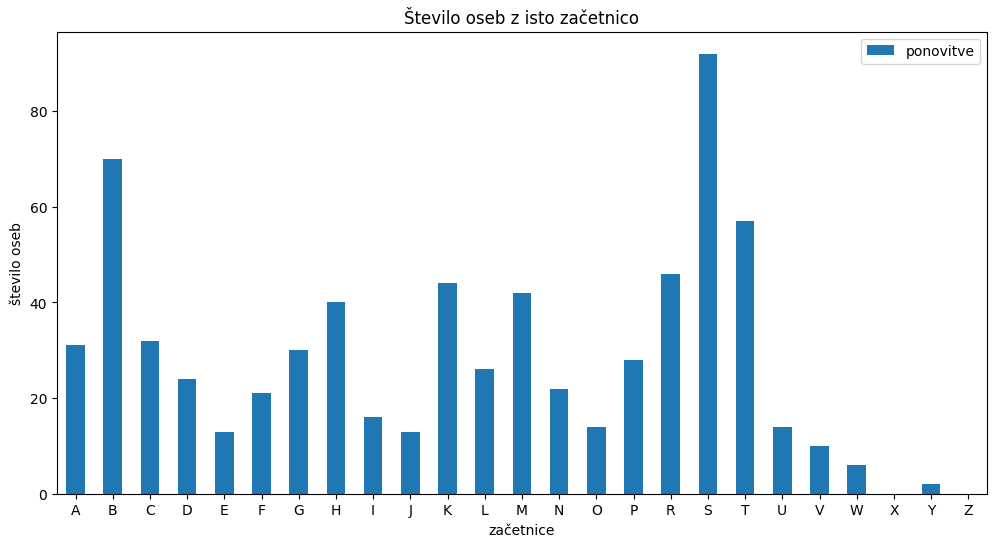

In [10]:
zacetnice_pd.plot.bar(xlabel='začetnice', ylabel='število oseb', figsize=(12, 6), title='Število oseb z isto začetnico', rot=0)

### 3.2 Graf pojavitve v knjigah

V prikazu števila pojavitev na osebo je razvidno, da zelo malo oseba nastopa v 6 ali večih knjigah. 

<Axes: title={'center': 'Število pojavitev na osebo (top 20)'}, xlabel='osebe', ylabel='število pojavitev'>

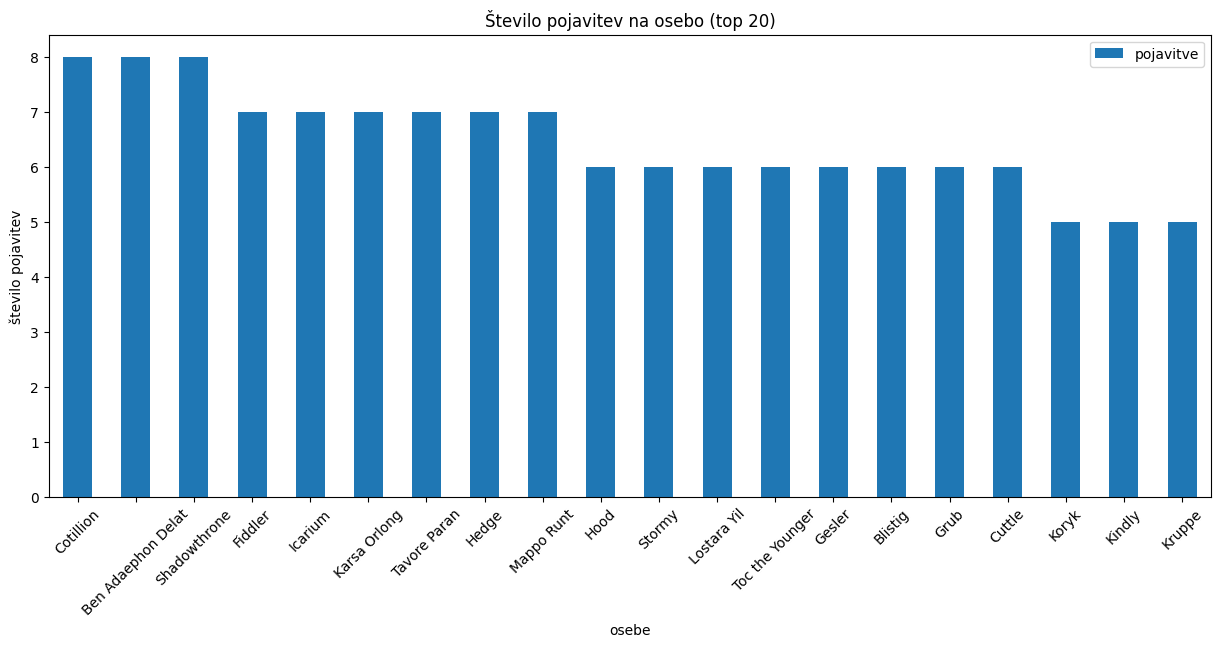

In [16]:
st_pojavitev_v_knjigah_top_20.plot.bar(xlabel='osebe', ylabel='število pojavitev', figsize=(15, 6), title='Število pojavitev na osebo (top 20)', rot=45)

### 3.3 Pogostost števila pojavitev

Pogostost števila pojavitev nam pokaže, da večina oseb nastopa le v eni knjigi. Tu bi dodal, da to zelo lepo sovpada z naslovom knjige "Book of the fallen", saj ogromno oseb, ki so v vsaki knjigi na novo predstavljene ne dočaka konca knjige.

<Axes: title={'center': 'Pogostost števila pojavitev'}, xlabel='pojavitev', ylabel='pogostost pojavitev'>

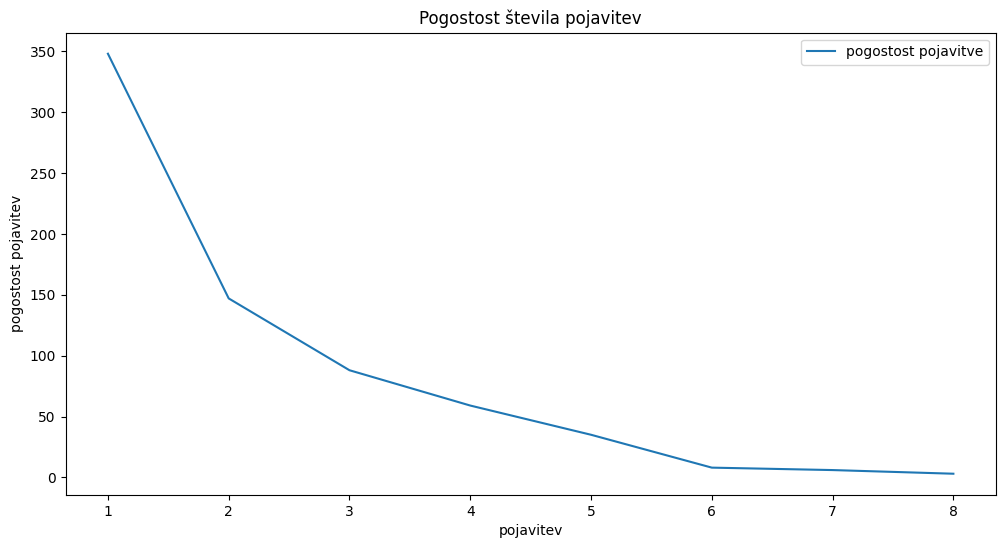

In [12]:
st_pojavitev_v_knjigah_pogostost.plot(x='pojavitve', xlabel='pojavitev', ylabel='pogostost pojavitev', figsize=(12, 6), title='Pogostost števila pojavitev')

### 3.4 Graf pojavitev imen v opisih

Spodnji graf nam pokaže 20 oseb, ki so najbolj uporabljenje za opisovanje drugih oseb, oziroma se opis drugih oseb nasloni nanje.

<Axes: title={'center': 'Število pojavitev v opisih (top 20)'}, xlabel='oseba', ylabel='število pojavitev'>

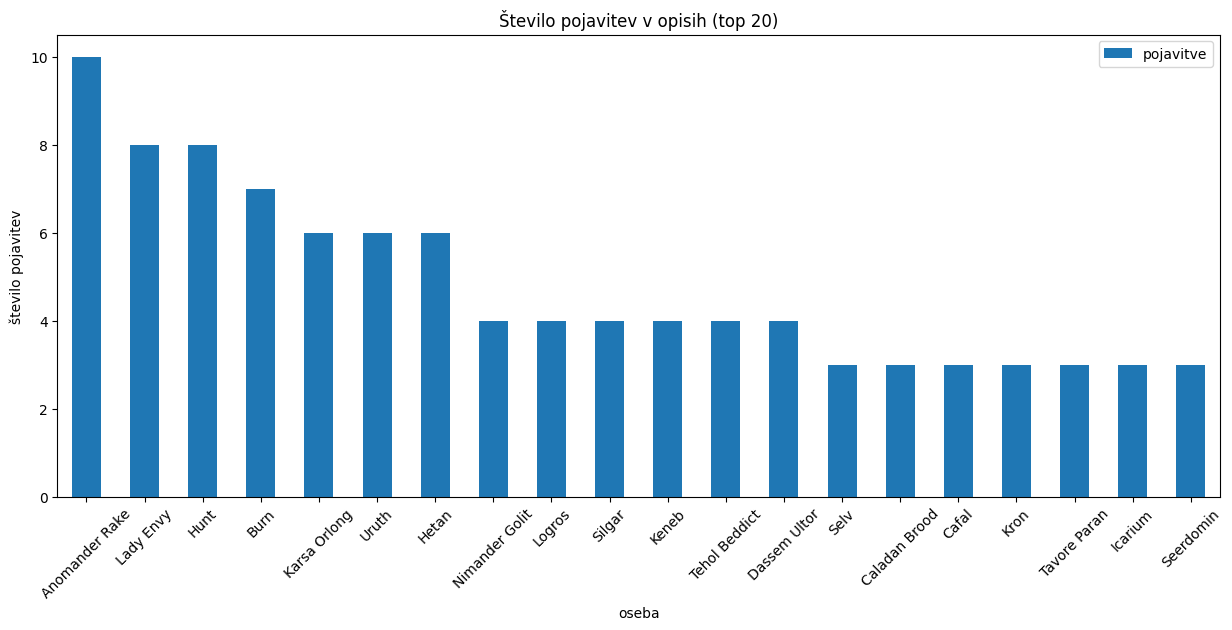

In [17]:
imena_opisi_pojavitve_top_20.plot.bar(xlabel='oseba', ylabel='število pojavitev', figsize=(15, 6), title='Število pojavitev v opisih (top 20)', rot=45)